Let's start by reading the dataset and divide it into train and test partition

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a DataFrame
df = pd.read_csv('dataset_preprocessed.csv')

# Definisci le caratteristiche (X) e il target (y)
X = df.drop(columns=[
    'music_genre_Alternative', 'music_genre_Anime', 'music_genre_Blues',
    'music_genre_Classical', 'music_genre_Country', 'music_genre_Electronic',
    'music_genre_Hip-Hop', 'music_genre_Jazz', 'music_genre_Rap', 'music_genre_Rock'
])

y = df[['music_genre_Alternative', 'music_genre_Anime', 'music_genre_Blues',
        'music_genre_Classical', 'music_genre_Country', 'music_genre_Electronic',
        'music_genre_Hip-Hop', 'music_genre_Jazz', 'music_genre_Rap', 'music_genre_Rock']].idxmax(axis=1)

# Split the data into training and testing sets (80/20 rule)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Firstly we are going to apply GridSearch in order to find the best parameter for the model from the one that we give in input

In [ ]:
# Define the AdaBoostClassifier model
adaboost_model = AdaBoostClassifier(random_state=42)

# Define the parameter grid for GridSearch
param_grid = {
    'n_estimators': [ 200 , 300],  # Numero di stime
    'learning_rate': [ 0.1, 1],  # Tasso di apprendimento
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]  # Modelli base (stumps)
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=adaboost_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Execute the grid search
grid_search.fit(X_train, y_train)

# Output the best parameters found
print("Migliori parametri trovati:", grid_search.best_params_)

# Use the best estimator to make predictions
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate model performance
print("Accuracy sul test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 8 candidates, totalling 40 fits


**Migliori parametri trovati: {'estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.1, 'n_estimators': 200}**

Let's see the confusion matrix then

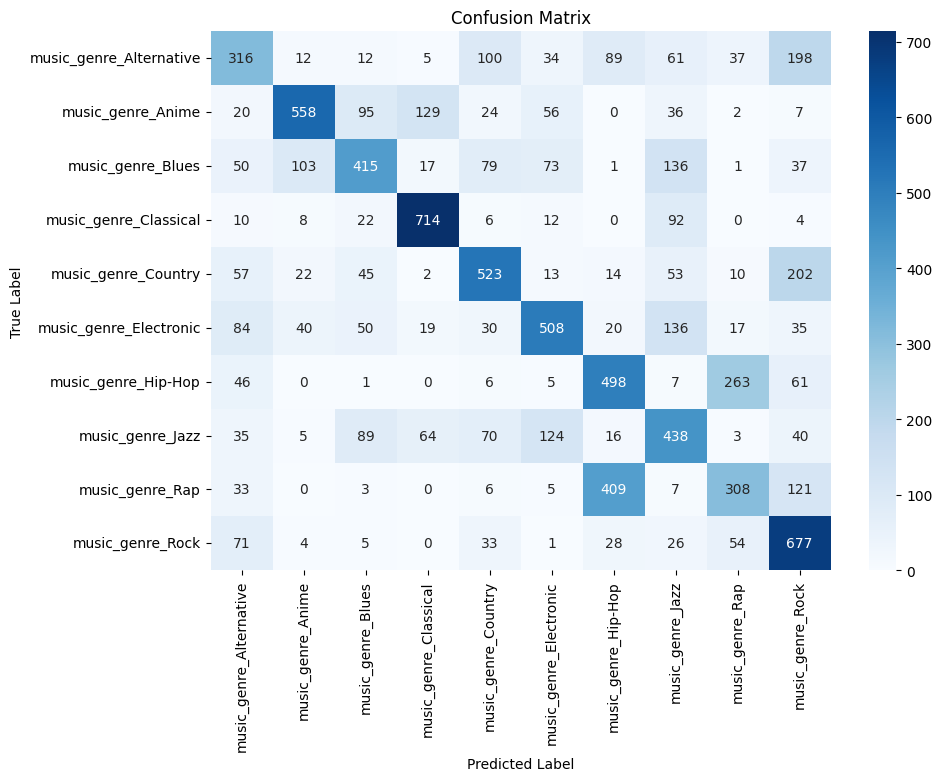

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using an heatmap with correct labels
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=grid_search.best_estimator_.classes_, yticklabels=grid_search.best_estimator_.classes_)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

The performance of the model are slightly worse than the Random Forest model. As we did in the previous test with the other models, in order to improve accuracy let's see if removing the 2 most critical genres from the categorization is helpful, and how much.

Accuracy sul test set: 0.6486336523789707
                        precision    recall  f1-score   support

     music_genre_Anime       0.81      0.63      0.71       948
     music_genre_Blues       0.53      0.50      0.51       875
 music_genre_Classical       0.79      0.75      0.77       903
   music_genre_Country       0.61      0.57      0.59       853
music_genre_Electronic       0.62      0.58      0.60       903
      music_genre_Jazz       0.47      0.54      0.50       908
       music_genre_Rap       0.82      0.80      0.81       917
      music_genre_Rock       0.60      0.81      0.69       902

              accuracy                           0.65      7209
             macro avg       0.66      0.65      0.65      7209
          weighted avg       0.66      0.65      0.65      7209



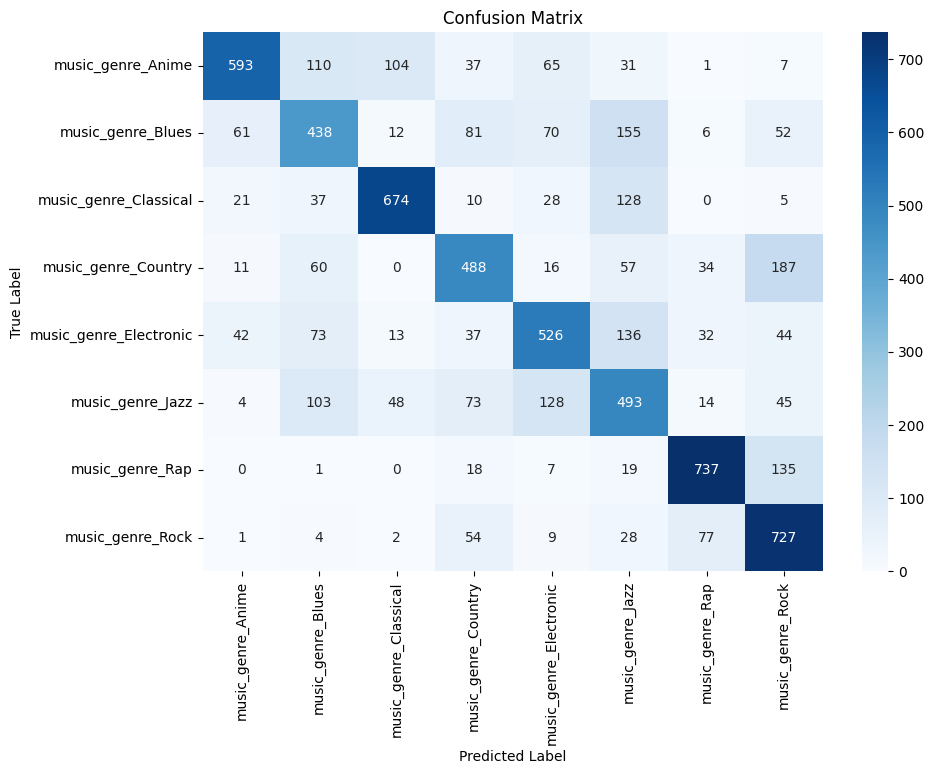

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import numpy as np
# Load the dataset into a DataFrame
df = pd.read_csv('dataset_preprocessed.csv')

# Exclude rows where 'Alternative' or 'Hip-Hop' are the genre
df = df[(df['music_genre_Alternative'] == 0) & (df['music_genre_Hip-Hop'] == 0)]

# Remove the 'Alternative' and 'Hip-Hop' columns from the target and keep the others
X = df.drop(columns=[
    'music_genre_Alternative', 'music_genre_Rock', 'music_genre_Rap', 'music_genre_Hip-Hop',
    'music_genre_Anime', 'music_genre_Blues', 'music_genre_Classical', 'music_genre_Country',
    'music_genre_Electronic', 'music_genre_Jazz'
])

# Define the target (y) excluding 'Alternative' and 'Hip-Hop'
y = df[['music_genre_Rock', 'music_genre_Anime', 'music_genre_Blues', 'music_genre_Classical','music_genre_Rap',
        'music_genre_Country', 'music_genre_Electronic', 'music_genre_Jazz']].idxmax(axis=1)

# Split the data into training and testing sets (80/20 rule)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the AdaBoostClassifier model
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2),
    learning_rate=0.1,
    n_estimators=200,
    random_state=42
)

# Training the model
adaboost_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = adaboost_model.predict(X_test)

# Evaluate model performance
print("Accuracy on the test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using a heatmap with correct labels
plt.figure(figsize=(10, 7))

# Use the labels from the model to ensure they are in the correct order
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=adaboost_model.classes_, yticklabels=adaboost_model.classes_)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


In this model the removing of the 2 classes generates a confusion in the Rock genre often predicted as Rap, influencing in a negative way the accuracy and recall of both genre. Rock also interfere in the correct labeling of Country music, probably because of similarity in the instrumentality and sound.



we have seen how in random forest grouping the 3 genres "Rap" "Alternative" and "Hip-Hop" improved by a wide margin the performance of the model, keeping a logical structure intact, considering the Rap and Alternative genre being a sub-genre of Hip-Hop.
Let's focus on how well this grouping impact in AdaBoost

Accuracy sul test set: 0.6410740042161323
                        precision    recall  f1-score   support

         Grouped_Genre       0.89      0.65      0.75      2643
     music_genre_Anime       0.76      0.68      0.72       927
     music_genre_Blues       0.58      0.53      0.55       912
 music_genre_Classical       0.80      0.77      0.78       868
   music_genre_Country       0.54      0.61      0.57       941
music_genre_Electronic       0.59      0.56      0.57       939
      music_genre_Jazz       0.43      0.50      0.46       884
      music_genre_Rock       0.46      0.81      0.59       899

              accuracy                           0.64      9013
             macro avg       0.63      0.64      0.63      9013
          weighted avg       0.68      0.64      0.65      9013



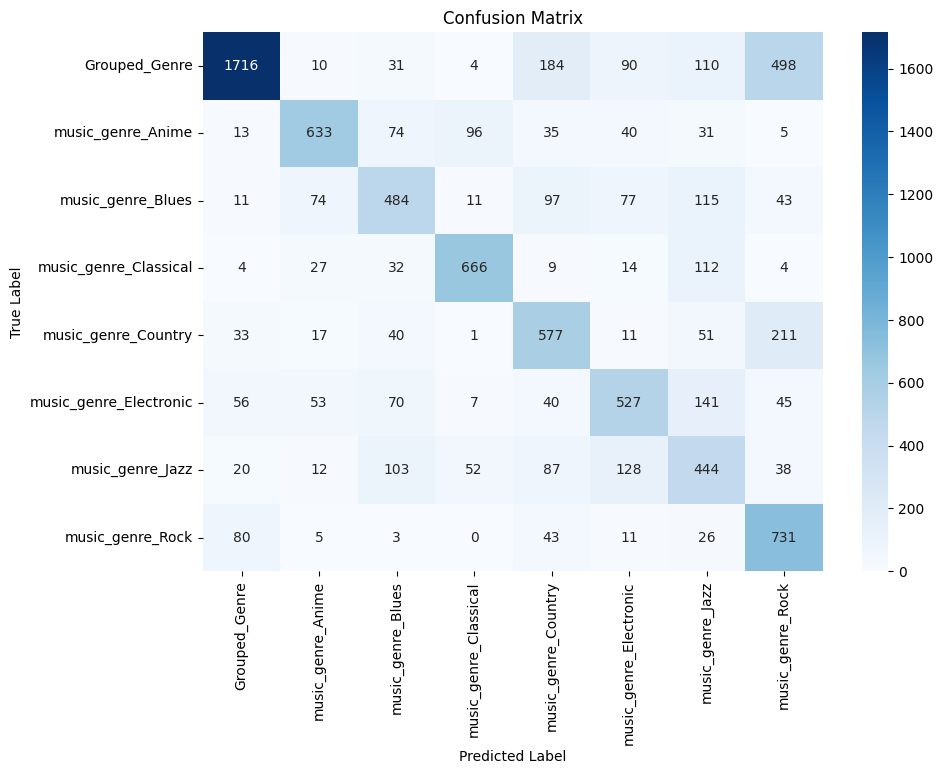

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load the dataset into a DataFrame
df = pd.read_csv('dataset_preprocessed.csv')

# Grouping Alternative, Rap, Hip-Hop in a single Genre
df['Grouped_Genre'] = df[['music_genre_Alternative', 'music_genre_Rap', 'music_genre_Hip-Hop']].max(axis=1)

# Define the target (y)
y = df[['Grouped_Genre', 'music_genre_Rock',  'music_genre_Anime', 'music_genre_Blues', 'music_genre_Classical',
        'music_genre_Country', 'music_genre_Electronic', 'music_genre_Jazz']].idxmax(axis=1)

# Removing no more necessary column from X (caratteristiche)
X = df.drop(columns=[
    'Grouped_Genre', 'music_genre_Alternative', 'music_genre_Rock', 'music_genre_Rap', 'music_genre_Hip-Hop',
    'music_genre_Anime', 'music_genre_Blues', 'music_genre_Classical', 'music_genre_Country',
    'music_genre_Electronic', 'music_genre_Jazz'
])

# Split the data into training and testing sets (80/20 rule)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We take in input the optimal parameter given by GridSearch
adaboost_optimized = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2, class_weight='balanced'),  #bilanciamo al fine di non rendere la classe grouped troppo grande
    learning_rate=0.1,  # Learning rate ottimizzato
    n_estimators=200,  # Numero di stime ottimizzato
    random_state=42
)

# Training the model
adaboost_optimized.fit(X_train, y_train)

# Predictions on the test set
y_pred = adaboost_optimized.predict(X_test)

# Evaluate model performance
print("Accuracy sul test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using an heatmap with correct labels
plt.figure(figsize=(10, 7))

# Use the labels from the model to ensure they are in the correct order
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=adaboost_optimized.classes_, yticklabels=adaboost_optimized.classes_)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


The results shows also an increse in accuracy in this model compared to the previous 2, but lesser than the improve obtained with Random Forest

and as result here too grouping the genres have a better impact in terms of performance than by removing it, let's analyze the model using the ROC Curves in order to show the trade-off between true and false positive.

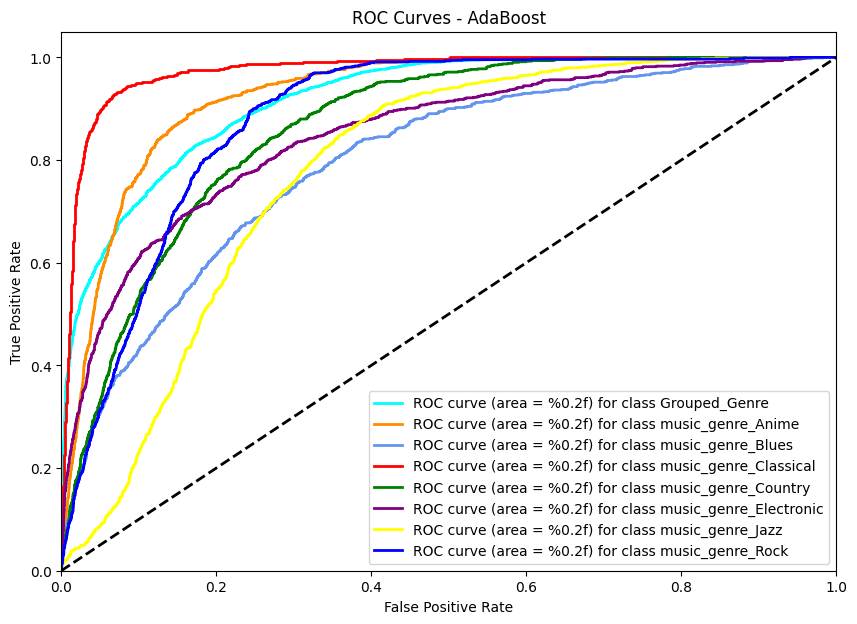

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

# Binarize the target for multi-class ROC curve
y_bin_adaboost = label_binarize(y_test, classes=np.unique(y_test))
n_classes_adaboost = y_bin_adaboost.shape[1]

# Predict probabilities
y_score_adaboost = adaboost_optimized.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes_adaboost):
    fpr[i], tpr[i], _ = roc_curve(y_bin_adaboost[:, i], y_score_adaboost[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Ottieni i nomi delle classi dalle etichette uniche di y_test
class_names = np.unique(y_test)

# Plot ROC curve for each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'yellow', 'blue'])
plt.figure(figsize=(10, 7))
for i, color in zip(range(n_classes_adaboost), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = %0.2f) for class {class_names[i]}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - AdaBoost')
plt.legend(loc="lower right")
plt.show()
